In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

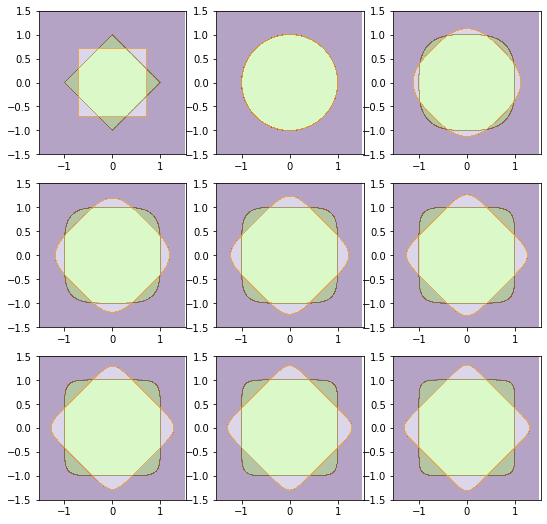

In [42]:
x, y = np.meshgrid(np.linspace(-1.5, 1.5, 1000), np.linspace(-1.5, 1.5, 1000))
sx, sy = 1, 1
f, axs = plt.subplots(3, 3, figsize=(9,9))
theta = 45 * np.pi/180
for i, ax in enumerate(axs.flatten()):
  p = i+1
  z1 = (  np.abs(x/sx)**p + np.abs(y/sy)**p  )**(1/p) < 1
  z2 = (  np.abs(x/sx*np.cos(theta)-y/sy*np.sin(theta))**p + np.abs(x/sx*np.sin(theta)+y/sy*np.cos(theta))**p  )**(1/p) < 1
  ax.contourf(x, y, z1, cmap=plt.cm.brg, alpha=0.2)
  ax.contourf(x, y, z2, cmap=plt.cm.hot, alpha=0.2)
  ax.axis('equal')

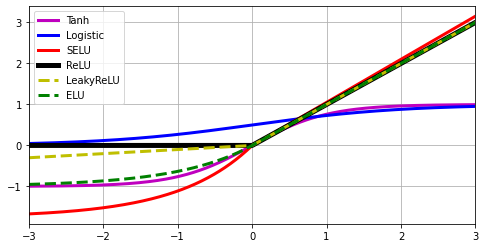

In [77]:
x = np.linspace(-3, 3, 500)
relu = np.vectorize(lambda x: 0*x if x < 0 else x)
leakyrelu = np.vectorize(lambda x: 0.1*x if x < 0 else x)
elu = np.vectorize(lambda x: 1*(np.exp(x) - 1) if x < 0 else x)
selu = np.vectorize(lambda x: 1.05070098 * 1.67326324 * (np.exp(x) - 1) if x < 0 else 1.05070098*x)
tanh = np.tanh
sigmoid = np.vectorize(lambda x: 1 / ( 1 + np.exp(-x) ))

f = plt.figure(figsize=(8,4))
plt.plot(x, tanh(x), label='Tanh', c='m', lw=3)
plt.plot(x, sigmoid(x), label='Logistic', c='b', lw=3)
plt.plot(x, selu(x), label='SELU', c='r', lw=3)
plt.plot(x, relu(x), label='ReLU', c='k', lw=5)
plt.plot(x, leakyrelu(x), label='LeakyReLU', c='y', lw=3, ls='--')
plt.plot(x, elu(x), label='ELU', c='g', lw=3, ls='--')
plt.grid(True)
plt.xlim(x[0], x[-1])
plt.legend()
plt.savefig('activations.png', bbox_inches='tight', facecolor='w',transparent=False)

$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2  + \dots + \theta_nx_n$

* $x_i$ is the $i^{th}$ feature value.
* $n$ is the number of features (e.g. ```X.shape[1]```)
* $\hat{y}$ is the predicted value.
* $\theta_j$ is the $j^{th}$ model parameter (including the bias term $\theta_0$ and feature weights $\theta_1,\theta_2,\dots,\theta_n$).

<!-- $\hat{\vec{y}}=h_{\mathbf{\theta}}\left(\mathbf{x\mathbf{X}\vec{\theta} + \vec{b}$ -->

$\hat{y}=h_{\mathbf{\theta}}\left(\mathbf{x}\right)=\mathbf{\theta}\cdot\mathbf{x}=\mathbf{\theta}^T\mathbf{x}$

$\hat{\vec{y}}=\mathbf{X}\mathbf{\theta}$


* $m$ is the numer of instances in the dataset
* $\mathbf{x^{(i)}}$ is a vector of the feature values of the $i^{th}$ instance in
the dataset, and $y^{(i)}$ is its label.
* $\mathbf{X}$ is a matrix containing the feature values of all instances in
the dataset. There is one row per instance, and the $i^{th}$ row is equal to $\left(\mathbf{x^{(i)}}\right)^T$.


$\mathbf{X} = \begin{pmatrix}
\left(\mathbf{x^{(1)}}\right)^T \\
\left(\mathbf{x^{(2)}}\right)^T \\
\vdots \\
\left(\mathbf{x^{(m)}}\right)^T \\
\end{pmatrix} = \begin{pmatrix}
1 & x_1^1 & x_2^1 & \dots & x_n^1 \\
1 & x_1^2 & x_2^2 & \dots & x_n^2 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_1^m & x_2^m & \dots & x_n^m
\end{pmatrix}$

$J = \text{MSE}(\mathbf{X},h_{\mathbf{\theta}}) \equiv \frac{1}{m}\sum^{m}_{i=1} \left(\hat{y}^{(i)} - y^{(i)}\right)^2 = \frac{1}{m}\sum^{m}_{i=1} \left(\mathbf{\theta}^T\mathbf{x}^{(i)} - y^{(i)} \right)^2 = \left(\mathbf{X}\mathbf{\theta} - \vec{y}\right)^2$


$\frac{\partial}{\partial\theta_j}MSE\left(\mathbf{\theta}\right) = \frac{2}{m}\sum^{m}_{i=1} \left(\hat{y}^{(i)} - y^{(i)} \right)\frac{\partial\hat{y}^{(i)}}{\partial\theta_j} = \frac{2}{m}\sum^{m}_{i=1} \left(\mathbf{\theta}^T\mathbf{x}^{(i)} - y^{(i)} \right)\mathbf{x}^{(i)}_j$

$\nabla_{\mathbf{\theta}}MSE\left(\mathbf{\theta}\right) = \frac{2}{m}\mathbf{X}^T\left(\mathbf{X}\mathbf{\theta} - \vec{y}\right)$


$\mathbf{\theta}^{\text{(next step)}} = \mathbf{\theta}-\eta\nabla_{\mathbf{\theta}}MSE\left(\mathbf{\theta}\right)$



---

When gradient is $\vec0$, loss function is minimized and the optimal $\mathbf{\hat\theta}$ is found:

$0 = \frac{2}{m}\mathbf{X}^T\left(\mathbf{X}\mathbf{\hat\theta} - \vec{y}\right)$

$\therefore \mathbf{\hat\theta} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\vec{y}$

---



```python

from tensorflow import keras
model = keras.models.Sequential([
  keras.layers.Dropout(rate=0.2),
  keras.layers.Dense(units=100, activation='relu', input_shape=X.shape[1:],
                      kernel_regularizer=keras.regularizers.L2(0.01)),
  keras.layers.Dropout(rate=0.2),
  keras.layers.Dense(units=1,   activation='linear',
                      kernel_regularizer=keras.regularizers.L2(0.01)),
])
model.compile(loss='mse', optimizer='adam')
model.fit(X, y, callbacks=[ keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True) ])

```

In [1]:
def  call(self, y_true, y_pred, sample_weight=None) -> tf.Tensor:
  print(y_pred[:3], y_true[:3])
  eleP2_pred = y_pred[:,0,None]**2 * tf.reduce_sum( y_true[:,:,0]**2, axis=-1, keepdims=True )
  proP2_pred = y_pred[:,1,None]**2 * tf.reduce_sum( y_true[:,:,1]**2, axis=-1, keepdims=True )
  print(eleP2_pred[:3], proP2_pred[:3])

  ele = tf.concat( [ ( self.ELECTRON_MASS**2 + eleP2_pred )**(1/2), y_pred[:,0,None]*y_true[:,:,0] ], axis=1 ) 
  pro = tf.concat( [ (   self.PROTON_MASS**2 + proP2_pred )**(1/2), y_pred[:,1,None]*y_true[:,:,1] ], axis=1 ) 
  print(ele[:3], pro[:3])
  
  MM2_pred = tf.reduce_sum(self.METRIC * ( self.BEAM + self.TARG - ele - pro )**2, axis=-1, keepdims=True)
  print(MM2_pred[:3])

  if self.reg:
    return tf.reduce_mean( ( self.PION_MASS**2 - MM2_pred )**2 ) + self.reg * tf.math.reduce_mean(tf.square(1 - y_pred))
  return   tf.reduce_mean( ( self.PION_MASS**2 - MM2_pred )**2 )





NameError: name 'tf' is not defined

In [8]:
emass, pmass, pimass = 0.0005110, 0.9382721, 0.1349768
emult, pmult = 0, 0
lE, lx, ly, lz = 10.6041, 0, 0, 10.6041
tE, tx, ty, tz =   pmass, 0, 0, 0

ex, ey, ez = -1.1904202, -0.1119123,  7.1179643
px, py, pz = 0.06607562, -0.31758812, 0.5202775

eP2 = emult**2 * ( ex**2 + ey**2 + ez**2)
pP2 = pmult**2 * ( px**2 + py**2 + pz**2)

print(f"{eP2=}, {pP2=}")

eEp, exp, eyp, ezp = ( emass**2 + eP2 )**(1/2), emult*ex, emult*ey, emult*ez
pEp, pxp, pyp, pzp = ( pmass**2 + pP2 )**(1/2), pmult*px, pmult*py, pmult*pz

print(f"{eEp=}, {exp=}, {eyp=}, {ezp=}")
print(f"{pEp=}, {pxp=}, {pyp=}, {pzp=}")

mm2 = (lE + tE - eEp - pEp)**2 - \
      (lx + tx - exp - pxp)**2 - \
      (ly + ty - eyp - pyp)**2 - \
      (lz + tz - ezp - pzp)**2
print(f"{mm2=}, {pimass**2=}")

eP2=0.0, pP2=0.0
eEp=0.000511, exp=-0.0, eyp=-0.0, ezp=0.0
pEp=0.9382721, pxp=0.0, pyp=-0.0, pzp=0.0
mm2=-0.010837129078979046, pimass**2=0.01821873653824
